# imports 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

# XGBoost 
import xgboost as xgb 

# Human Resources employee survey 

In [2]:
hr = pd.read_csv('employee_survey.csv')
hr = hr.rename(columns={
    'time_spend_company': 'years_with_company',
    'Work_accident': 'work_accident',
    'Department': 'department'
})

In [3]:

hr.head(10) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
years_with_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [5]:
hr['left'].value_counts(dropna=False)

left
0    11428
1     3571
Name: count, dtype: int64

In [6]:
hr['left'].value_counts(normalize=True, dropna=False)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   years_with_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# GB 1

quickly get feature importance and initial predictions with no preprocessing for this 1st model and use it as an initial baseline 

In [8]:
X1 = hr.drop(columns='left')
X1 = pd.get_dummies(X1, columns=['department', 'salary'])
y1 = hr['left']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [9]:
m1 = GradientBoostingClassifier(random_state=42)
m1.fit(X1_train, y1_train)

GradientBoostingClassifier(random_state=42)

In [10]:
# What are the most important features? 
feature_importances = pd.DataFrame({
    'feature': X1.columns,
    'importance': m1.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importances['importance'] = feature_importances['importance'].round(2)

feature_importances

,feature,importance
0,satisfaction_level,0.55
4,years_with_company,0.17
2,number_project,0.10
1,last_evaluation,0.10
3,average_montly_hours,0.07
5,work_accident,0.00
18,salary_low,0.00
17,salary_high,0.00
16,department_technical,0.00
7,department_IT,0.00


In [11]:
feature_importances = pd.DataFrame({
    'feature': X1.columns,
    'importance': m1.feature_importances_
})

feature_importances['importance'] = feature_importances['importance'].round(2)

In [12]:
y1_pred = m1.predict(X1_test)

## results: Scikit-learn Gradient Booster 

Not bad with very little preprocessing

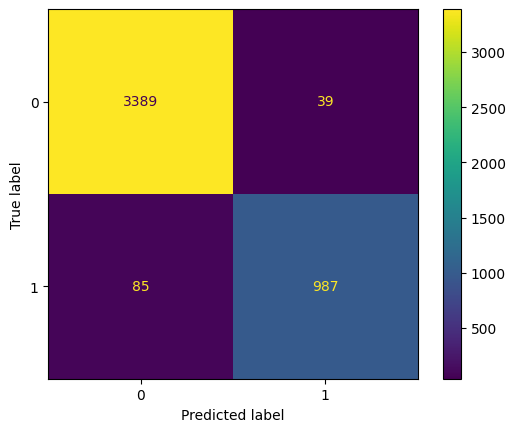

In [13]:
log_cm = confusion_matrix(y1_test, y1_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()

In [14]:
print(classification_report(y1_test, y1_pred, target_names=['stayed', 'left']))

              precision    recall  f1-score   support

      stayed       0.98      0.99      0.98      3428
        left       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



# GB 2

In [ ]:
hr2 = pd.get_dummies(hr, columns=['department', 'salary'])

X2 = hr2.drop(columns=['left']).values 
y2 = hr2['left'].values 

train_size = int(0.7 * len(X2))  # 70% training, 30% testing
X2_train, X2_test = X2[:train_size], X2[train_size:]
y2_train, y2_test = y2[:train_size], y2[train_size:]

In [33]:
# m2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# m2.fit(X2_train, y2_train)

# Create DMatrix with explicit feature names
feature_names = hr2.drop(columns='left').columns.tolist()

dtrain = xgb.DMatrix(X2_train, label=y2_train, feature_names=feature_names)
dtest = xgb.DMatrix(X2_test, label=y2_test, feature_names=feature_names)

params = {
    'objective': 'binary:logistic', # For binary classification
    'eval_metric': 'logloss',       # Log loss evaluation metric
    'seed': 42                      # For reproducibility
}

m2 = xgb.train(params=params, 
               dtrain=dtrain, 
               num_boost_round=50, 
               evals=[(dtrain, 'train'), (dtest, 'test')], 
               verbose_eval=10)

y2_pred = m2.predict(dtest)


[0]	train-logloss:0.29443	test-logloss:0.38796
[10]	train-logloss:0.06882	test-logloss:0.11717
[20]	train-logloss:0.05718	test-logloss:0.09985
[30]	train-logloss:0.04921	test-logloss:0.08787
[40]	train-logloss:0.04344	test-logloss:0.08006
[49]	train-logloss:0.03613	test-logloss:0.06779


In [34]:
print(np.round(y2_pred, 2))

[0.04 0.   0.01 ... 0.99 1.   0.99]


[0]	train-logloss:0.29443	test-logloss:0.38796
[10]	train-logloss:0.06882	test-logloss:0.11717
[20]	train-logloss:0.05718	test-logloss:0.09985
[30]	train-logloss:0.04921	test-logloss:0.08787
[40]	train-logloss:0.04344	test-logloss:0.08006
[49]	train-logloss:0.03613	test-logloss:0.06779


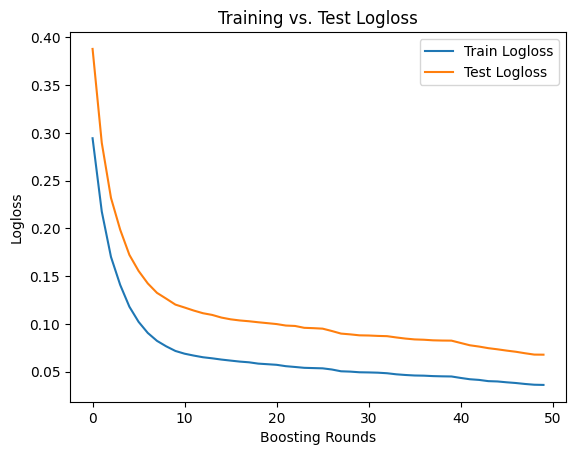

In [35]:
results = {}
bst = xgb.train(params, dtrain, num_boost_round=50, evals=[(dtrain, 'train'), (dtest, 'test')], evals_result=results, verbose_eval=10)

plt.plot(results['train']['logloss'], label='Train Logloss')
plt.plot(results['test']['logloss'], label='Test Logloss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Logloss')
plt.legend()
plt.title('Training vs. Test Logloss')
plt.show()

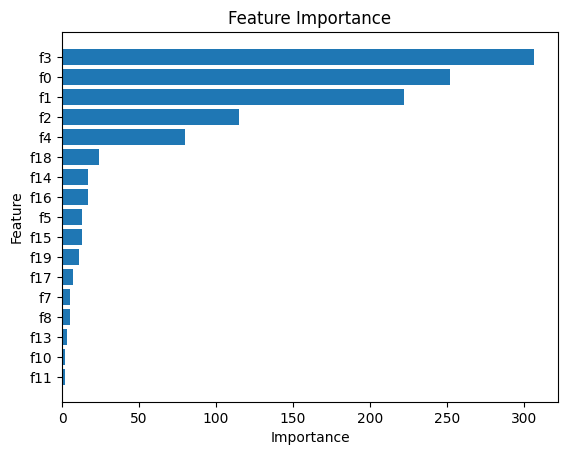

In [29]:
# Get feature importance scores
importance = bst.get_score(importance_type='weight')  

# Convert to DataFrame for easier visualization
importance_df = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values(by='importance', ascending=False)

# Bar plot
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Flip the order
plt.show()

## results: XGBoost Gradient Booster

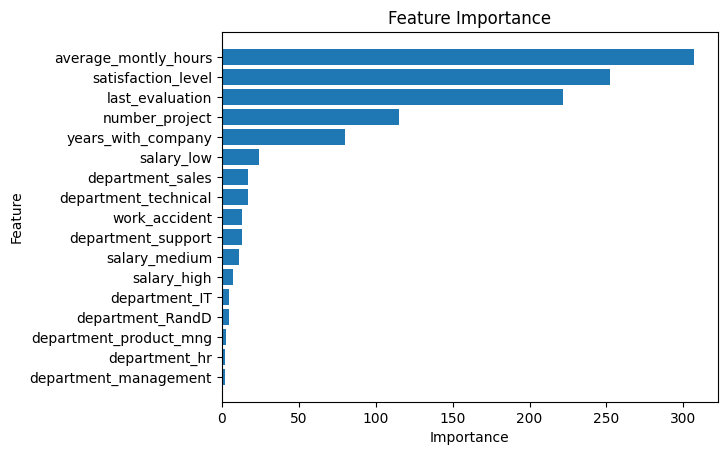

In [38]:
# Get feature importance scores
importance = bst.get_score(importance_type='weight')

# Create DataFrame directly using the importance dictionary
importance_df = pd.DataFrame({
    'feature': list(importance.keys()),  # These will now be human-readable names
    'importance': list(importance.values())
}).sort_values(by='importance', ascending=False)

plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [39]:
# Make predictions (convert probabilities to binary 0/1 predictions)
y_pred = (bst.predict(dtest) > 0.5).astype(int)  

# Generate the classification report
feature_names = hr2.drop(columns='left').columns
print(classification_report(y2_test, y_pred, target_names=['Did Not Leave', 'Did Leave']))

               precision    recall  f1-score   support

Did Not Leave       0.97      0.99      0.98      2929
    Did Leave       0.98      0.95      0.96      1571

     accuracy                           0.98      4500
    macro avg       0.98      0.97      0.97      4500
 weighted avg       0.98      0.98      0.98      4500

